In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# Load your prepared flat dataset
df = pd.read_csv("F:/MySelf/ai-customer-care/data/chat_datasets/customer_care_dataset_flat.csv")

In [14]:
# Emotion labels
emotion_labels = {
    0: "no emotion",
    1: "anger",
    2: "disgust",
    3: "fear",
    4: "happiness",
    5: "sadness",
    6: "surprise"
}

# Map emotion index to text
df["emotion_label"] = df["emotion"].map(emotion_labels)

In [15]:
# 1. 🔍 Preview dataset
print("Shape:", df.shape)
print("Columns:", df.columns)
display(df.head())

Shape: (2053, 5)
Columns: Index(['turn', 'utterance', 'emotion', 'outcome', 'emotion_label'], dtype='object')


,turn,utterance,emotion,outcome,emotion_label
0,6,Customer: I appreciate your help.,4,resolved,happiness
1,4,Customer: Please notify me once it's dispatched.,3,resolved,fear
2,2,Customer: I’m grossed out. This wasn’t premium...,2,escalated,disgust
3,0,Customer: I'm angry that I received a damaged ...,1,escalated,anger
4,6,Customer: Thank you for moving fast on this.,4,resolved,happiness


In [16]:
df["emotion"].value_counts()


emotion
4    310
3    310
1    310
2    295
6    295
0    280
5    253
Name: count, dtype: int64

C:\Users\DELL\AppData\Local\Temp\ipykernel_5124\4058328575.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="emotion_label", order=df["emotion_label"].value_counts().index, palette="viridis")


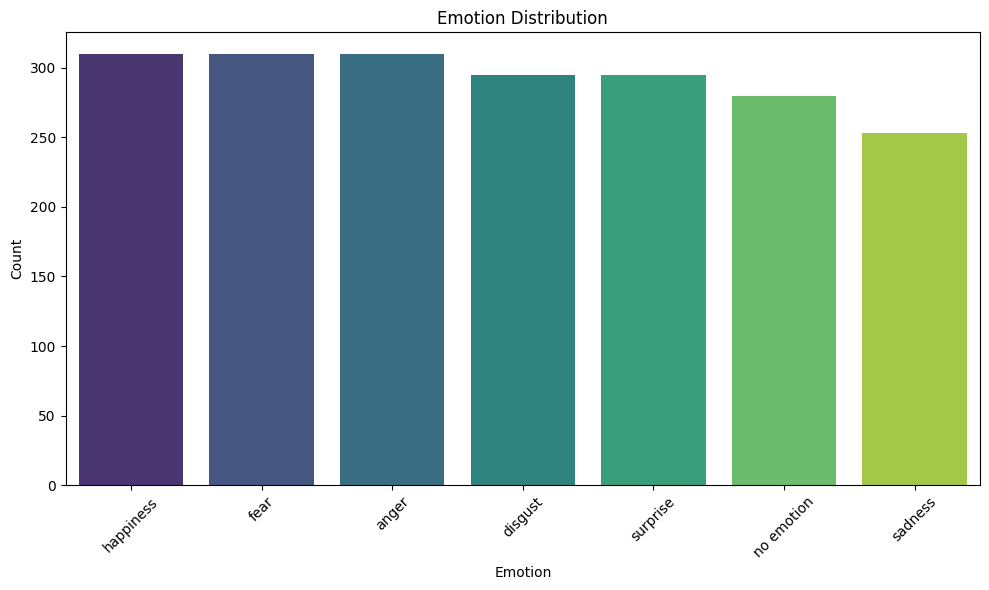

In [17]:
# Plot emotion distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x="emotion_label", order=df["emotion_label"].value_counts().index, palette="viridis")
plt.title("Emotion Distribution")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\DELL\AppData\Local\Temp\ipykernel_5124\2171039361.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="outcome", palette="pastel")


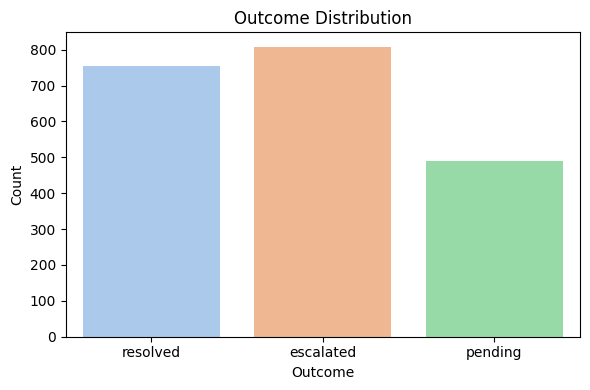

In [18]:
# Plot outcome distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="outcome", palette="pastel")
plt.title("Outcome Distribution")
plt.xlabel("Outcome")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

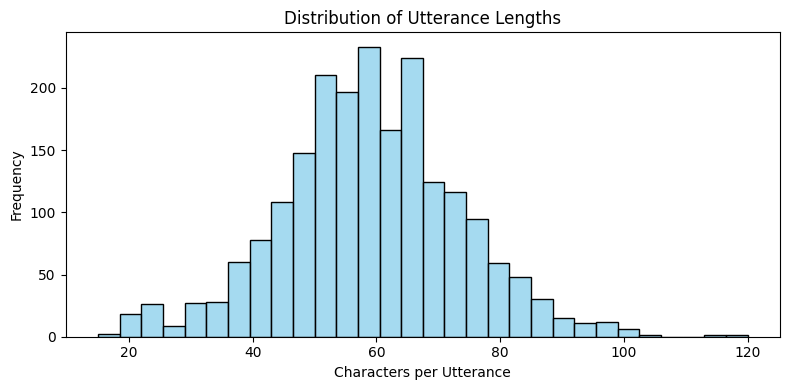

In [19]:
# 4. 📈 Utterance Length Distribution
df["length"] = df["utterance"].str.len()
plt.figure(figsize=(8, 4))
sns.histplot(df["length"], bins=30, color="skyblue")
plt.title("Distribution of Utterance Lengths")
plt.xlabel("Characters per Utterance")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

In [20]:
# 📊 Crosstab: Emotion vs Outcome
pd.crosstab(df["emotion_label"], df["outcome"])

outcome,escalated,pending,resolved
emotion_label,,,
anger,185,85,40
disgust,190,66,39
fear,162,46,102
happiness,33,58,219
no emotion,62,104,114
sadness,69,59,125
surprise,107,73,115


C:\Users\DELL\AppData\Local\Temp\ipykernel_5124\3895446566.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="emotion_label", y="length", palette="Set3")


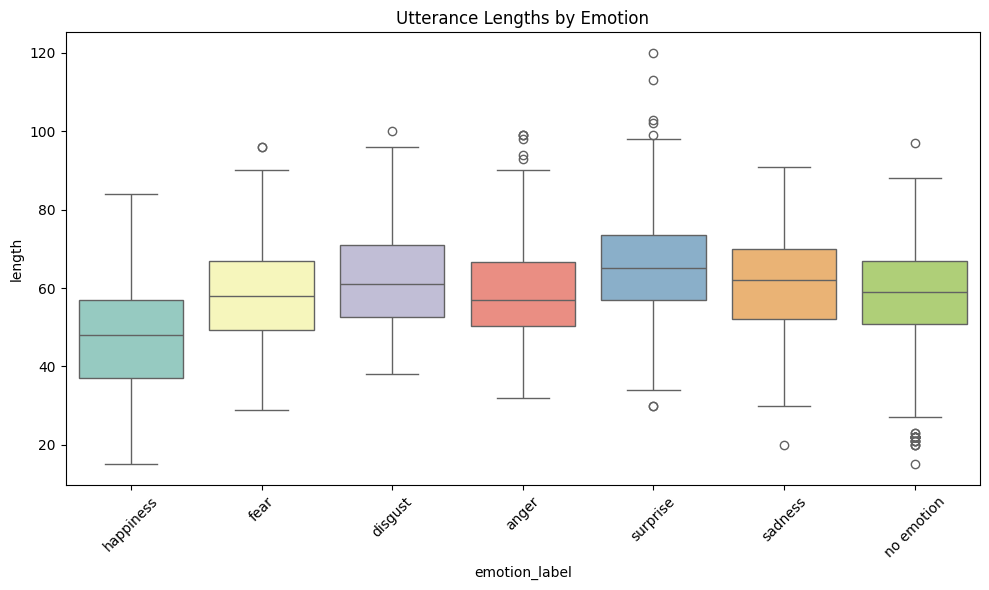

In [21]:
# 📈 Boxplot of Utterance Length by Emotion
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="emotion_label", y="length", palette="Set3")
plt.title("Utterance Lengths by Emotion")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
# 🧠 Top Words per Emotion
from collections import Counter
import re

def top_words(df, label, n=10):
    text = " ".join(df[df["emotion_label"] == label]["utterance"])
    words = re.findall(r'\w+', text.lower())
    return Counter(words).most_common(n)

for label in df["emotion_label"].unique():
    print(f"🔹 Top words for {label}:")
    print(top_words(df, label))

🔹 Top words for happiness:
[('agent', 185), ('customer', 125), ('you', 110), ('to', 61), ('the', 57), ('thank', 56), ('i', 50), ('your', 50), ('for', 50), ('it', 48)]
🔹 Top words for fear:
[('i', 203), ('customer', 167), ('agent', 144), ('ll', 79), ('my', 72), ('m', 68), ('that', 57), ('s', 56), ('the', 55), ('it', 52)]
🔹 Top words for disgust:
[('customer', 291), ('i', 253), ('m', 143), ('disgusted', 132), ('this', 123), ('and', 104), ('by', 98), ('the', 87), ('it', 77), ('s', 65)]
🔹 Top words for anger:
[('customer', 308), ('i', 241), ('this', 95), ('and', 80), ('is', 60), ('my', 59), ('a', 56), ('m', 53), ('paid', 47), ('for', 45)]
🔹 Top words for surprise:
[('i', 227), ('agent', 158), ('m', 140), ('customer', 138), ('surprised', 94), ('the', 78), ('to', 73), ('ll', 64), ('s', 58), ('and', 57)]
🔹 Top words for sadness:
[('i', 292), ('agent', 159), ('m', 139), ('customer', 94), ('the', 78), ('this', 58), ('to', 53), ('and', 51), ('your', 51), ('that', 50)]
🔹 Top words for no emotion: